In [1]:
import pyodbc
import pandas as pd

SERVER_NAME = 'DESKTOP-MA33VD7\AHMED'  
DATABASE_NAME = 'RetailDB'      
DRIVER = '{ODBC Driver 17 for SQL Server}' 

try:
    conn_string = (
        f'DRIVER={DRIVER};'
        f'SERVER={SERVER_NAME};'
        f'DATABASE={DATABASE_NAME};'
        f'Trusted_Connection=yes;'
    )

    conn = pyodbc.connect(conn_string)
    print("Connection successful!")

    SQL_QUERY = """
        SELECT
            C.CustomerID, C.Name, C.Gender, C.Age, C.City AS CustomerCity, C.JoinDate,
            S.SaleID, S.SaleDate, S.TotalAmount AS SaleTotalAmount,
            B.BranchName, B.City AS BranchCity, B.Manager,
            SD.SaleDetailID, SD.Quantity, SD.UnitPrice AS LineItemUnitPrice, SD.TotalPrice AS LineItemTotalPrice,
            P.ProductID, P.ProductName, P.Category, P.Brand, P.UnitPrice AS ProductMasterPrice
        FROM
            Customers C
        INNER JOIN
            Sales S ON C.CustomerID = S.CustomerID
        INNER JOIN
            Branches B ON S.BranchID = B.BranchID
        INNER JOIN
            SaleDetails SD ON S.SaleID = SD.SaleID -- Joins Sale Header to Line Items
        INNER JOIN
            Products P ON SD.ProductID = P.ProductID; -- Joins Line Items to Product Master Data
        """


    df = pd.read_sql(SQL_QUERY, conn)

    print("\n--- DataFrame created successfully! ---")
    print(f"Shape of DataFrame: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())

except pyodbc.Error as ex:
    sqlstate = ex.args[0]
    print(f"Connection failed or Query Error: {sqlstate}")

finally:
    if 'conn' in locals() and conn:
        conn.close()
        print("\nConnection closed.")

Connection successful!


C:\Users\dell\AppData\Local\Temp\ipykernel_20360\4060928230.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(SQL_QUERY, conn)



--- DataFrame created successfully! ---
Shape of DataFrame: (210000, 21)

First 5 rows:
                             CustomerID         Name  Gender  Age  \
0  DBEBFF59-C21E-47B9-A583-569AECAB3911   Nour Ahmed  Female   20   
1  01018E9E-1F99-4083-8F40-C58E9AD47584   Omar Laila    Male   35   
2  DBEBFF59-C21E-47B9-A583-569AECAB3911   Nour Ahmed  Female   20   
3  56FE4730-11A1-49BD-A963-6F2E453DF308  Ahmed David    Male   70   
4  3720279B-A3DF-4E55-87DE-6A53E61AA6A1   Omar Laila  Female   52   

  CustomerCity                JoinDate                                SaleID  \
0         Giza 2024-10-18 09:10:37.080  E7B766C0-4008-4C0D-B63C-E3BFA5A2E664   
1       Assiut 2025-11-16 09:10:37.080  3183ED19-8ABF-4569-B7C5-C19B7F695F9A   
2         Giza 2024-10-18 09:10:37.080  958F087D-46AF-4C85-AA78-543EA84BED0B   
3        Cairo 2023-12-21 09:10:37.080  DB27E067-3825-4184-B4CD-14DF8F7AACAE   
4       Assiut 2024-06-05 09:10:37.080  589B79A7-2008-4EE8-849C-3C24E113F3C9   

               

In [2]:
df.to_csv("Retail_DB.csv", index= False)

In [3]:
import pandas as pd

data = pd.read_csv("data/Retail_DB.csv")

data.head()

,CustomerID,Name,Gender,Age,CustomerCity,JoinDate,SaleID,SaleDate,SaleTotalAmount,BranchName,...,Manager,SaleDetailID,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductID,ProductName,Category,Brand,ProductMasterPrice
0,EAB8B4FE-2C46-4357-B6D1-6FCF846E6486,Mohamed Hassan,Male,20,Assiut,2023-07-03 09:10:37.080,7D0E8679-5C69-484B-B10E-CF8A1C7541E8,2024-01-23 09:10:37.127,7182.0,Branch Assiut 26683,...,Ali Manager,BE760FC3-3528-40D8-AFF9-03A954821046,2,2465.0,4930.0,F4261946-0B13-4C69-87EF-3B309104F3BF,Adidas Sports 26847,Beauty,IKEA,2465.0
1,01018E9E-1F99-4083-8F40-C58E9AD47584,Omar Laila,Male,35,Assiut,2025-11-16 09:10:37.080,154D2BD3-602C-40F3-ABD8-4C47EDD4F43A,2025-02-09 09:10:37.127,3466.0,Branch Assiut 26665,...,Ali Manager,C6105C9F-01A4-4A68-B110-03AA25F4CB75,2,1733.0,3466.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0
2,6D332D8C-D069-4969-9049-9FAAA22F7A95,Hassan Michael,Female,18,Suez,2023-04-13 09:10:37.080,72834184-0948-4B72-B1A0-987C390C3847,2024-06-16 09:10:37.127,8183.0,Branch Assiut 26701,...,Ali Manager,3E76C220-6525-4699-AC82-03AA87B65DBF,3,1733.0,5199.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0
3,05565264-DCD1-45CE-9FD5-27C879E70EC3,Mohamed Hassan,Female,28,Assiut,2023-10-04 09:10:37.080,1F3995A7-5C56-4105-9944-8891792DF6A8,2025-07-19 09:10:37.127,13632.0,Branch Assiut 26710,...,Ali Manager,01973B4D-6604-4A76-A638-03AAC5DE4565,3,1733.0,5199.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0
4,BA494A1C-52A5-48EA-BB9C-579647680028,Nour Ahmed,Male,56,Giza,2025-05-02 09:10:37.080,EFDB1D7A-3547-446D-A613-DEEB1F190A09,2025-09-07 09:10:37.127,5199.0,Branch Assiut 26681,...,Ali Manager,E65271A0-620C-4FDF-8C95-03AAF366D4F1,3,1733.0,5199.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          210000 non-null  object 
 1   Name                210000 non-null  object 
 2   Gender              210000 non-null  object 
 3   Age                 210000 non-null  int64  
 4   CustomerCity        210000 non-null  object 
 5   JoinDate            210000 non-null  object 
 6   SaleID              210000 non-null  object 
 7   SaleDate            210000 non-null  object 
 8   SaleTotalAmount     210000 non-null  float64
 9   BranchName          210000 non-null  object 
 10  BranchCity          210000 non-null  object 
 11  Manager             210000 non-null  object 
 12  SaleDetailID        210000 non-null  object 
 13  Quantity            210000 non-null  int64  
 14  LineItemUnitPrice   210000 non-null  float64
 15  LineItemTotalPrice  210000 non-nul

In [5]:
data.describe()

,Age,SaleTotalAmount,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductMasterPrice
count,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,38.944981,8281.127138,1.997748,1745.761905,3490.335462,1745.761905
std,17.206378,3105.094296,0.817256,677.621109,2046.363850,677.621109
min,18.000000,1733.000000,1.000000,519.000000,519.000000,519.000000
25%,20.000000,5931.000000,1.000000,1733.000000,1733.000000,1733.000000
50%,35.000000,8396.000000,2.000000,1733.000000,3466.000000,1733.000000
75%,54.000000,10685.000000,3.000000,2465.000000,5199.000000,2465.000000
max,70.000000,14151.000000,3.000000,2465.000000,7395.000000,2465.000000


In [6]:
data.isnull().sum()

CustomerID            0
Name                  0
Gender                0
Age                   0
CustomerCity          0
JoinDate              0
SaleID                0
SaleDate              0
SaleTotalAmount       0
BranchName            0
BranchCity            0
Manager               0
SaleDetailID          0
Quantity              0
LineItemUnitPrice     0
LineItemTotalPrice    0
ProductID             0
ProductName           0
Category              0
Brand                 0
ProductMasterPrice    0
dtype: int64

In [7]:
data.head()

,CustomerID,Name,Gender,Age,CustomerCity,JoinDate,SaleID,SaleDate,SaleTotalAmount,BranchName,...,Manager,SaleDetailID,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductID,ProductName,Category,Brand,ProductMasterPrice
0,EAB8B4FE-2C46-4357-B6D1-6FCF846E6486,Mohamed Hassan,Male,20,Assiut,2023-07-03 09:10:37.080,7D0E8679-5C69-484B-B10E-CF8A1C7541E8,2024-01-23 09:10:37.127,7182.0,Branch Assiut 26683,...,Ali Manager,BE760FC3-3528-40D8-AFF9-03A954821046,2,2465.0,4930.0,F4261946-0B13-4C69-87EF-3B309104F3BF,Adidas Sports 26847,Beauty,IKEA,2465.0
1,01018E9E-1F99-4083-8F40-C58E9AD47584,Omar Laila,Male,35,Assiut,2025-11-16 09:10:37.080,154D2BD3-602C-40F3-ABD8-4C47EDD4F43A,2025-02-09 09:10:37.127,3466.0,Branch Assiut 26665,...,Ali Manager,C6105C9F-01A4-4A68-B110-03AA25F4CB75,2,1733.0,3466.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0
2,6D332D8C-D069-4969-9049-9FAAA22F7A95,Hassan Michael,Female,18,Suez,2023-04-13 09:10:37.080,72834184-0948-4B72-B1A0-987C390C3847,2024-06-16 09:10:37.127,8183.0,Branch Assiut 26701,...,Ali Manager,3E76C220-6525-4699-AC82-03AA87B65DBF,3,1733.0,5199.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0
3,05565264-DCD1-45CE-9FD5-27C879E70EC3,Mohamed Hassan,Female,28,Assiut,2023-10-04 09:10:37.080,1F3995A7-5C56-4105-9944-8891792DF6A8,2025-07-19 09:10:37.127,13632.0,Branch Assiut 26710,...,Ali Manager,01973B4D-6604-4A76-A638-03AAC5DE4565,3,1733.0,5199.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0
4,BA494A1C-52A5-48EA-BB9C-579647680028,Nour Ahmed,Male,56,Giza,2025-05-02 09:10:37.080,EFDB1D7A-3547-446D-A613-DEEB1F190A09,2025-09-07 09:10:37.127,5199.0,Branch Assiut 26681,...,Ali Manager,E65271A0-620C-4FDF-8C95-03AAF366D4F1,3,1733.0,5199.0,AAF41FEA-4C84-4649-8317-51F80489D34F,Adidas Sports 27222,Beauty,IKEA,1733.0


In [8]:
data["Manager"].unique()

array(['Ali Manager'], dtype=object)

In [9]:
data = data.drop(["CustomerID", "Name", "SaleID", "Manager", "SaleDetailID", "ProductID", "BranchCity"], axis= 1)

data.head()

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice
0,Male,20,Assiut,2023-07-03 09:10:37.080,2024-01-23 09:10:37.127,7182.0,Branch Assiut 26683,2,2465.0,4930.0,Adidas Sports 26847,Beauty,IKEA,2465.0
1,Male,35,Assiut,2025-11-16 09:10:37.080,2025-02-09 09:10:37.127,3466.0,Branch Assiut 26665,2,1733.0,3466.0,Adidas Sports 27222,Beauty,IKEA,1733.0
2,Female,18,Suez,2023-04-13 09:10:37.080,2024-06-16 09:10:37.127,8183.0,Branch Assiut 26701,3,1733.0,5199.0,Adidas Sports 27222,Beauty,IKEA,1733.0
3,Female,28,Assiut,2023-10-04 09:10:37.080,2025-07-19 09:10:37.127,13632.0,Branch Assiut 26710,3,1733.0,5199.0,Adidas Sports 27222,Beauty,IKEA,1733.0
4,Male,56,Giza,2025-05-02 09:10:37.080,2025-09-07 09:10:37.127,5199.0,Branch Assiut 26681,3,1733.0,5199.0,Adidas Sports 27222,Beauty,IKEA,1733.0


In [10]:
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              210000 non-null  object 
 1   Age                 210000 non-null  int64  
 2   CustomerCity        210000 non-null  object 
 3   JoinDate            210000 non-null  object 
 4   SaleDate            210000 non-null  object 
 5   SaleTotalAmount     210000 non-null  float64
 6   BranchName          210000 non-null  object 
 7   Quantity            210000 non-null  int64  
 8   LineItemUnitPrice   210000 non-null  float64
 9   LineItemTotalPrice  210000 non-null  float64
 10  ProductName         210000 non-null  object 
 11  Category            210000 non-null  object 
 12  Brand               210000 non-null  object 
 13  ProductMasterPrice  210000 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 22.4+ MB


((210000, 14), None)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == "object":
        data[col] = le.fit_transform(data[col])

data.head()

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice
0,1,20,0,1,51,7182.0,4,2,2465.0,4930.0,0,0,0,2465.0
1,1,35,0,11,434,3466.0,0,2,1733.0,3466.0,1,0,0,1733.0
2,0,18,3,0,196,8183.0,6,3,1733.0,5199.0,1,0,0,1733.0
3,0,28,0,2,594,13632.0,8,3,1733.0,5199.0,1,0,0,1733.0
4,1,56,2,8,644,5199.0,3,3,1733.0,5199.0,1,0,0,1733.0


In [12]:
for col in data.columns:
    print(f"{col}", data[col].unique())

Gender [1 0]
Age [20 35 18 28 56 70 54 52 53 27 30]
CustomerCity [0 3 2 1]
JoinDate [ 1 11  0  2  8  3  7 10  4  5  9  6]
SaleDate [ 51 434 196 594 644 464  18 324 428 109 180 261 105 635 170 339 281 520
 331 709 580  13 413 651 272  15 674 269  94 410 370 708 255 713 220 638
 160 144 706 600 647 161 417  11 724 649 125 359  44  75  67 669 189 608
  28 169 422 293 350 329 615 348 604 663 696  20 627  33 298 130 559 210
 423 239 717 113 357 466 702 369 211 609 187  65   8 421 283  58 558 489
  31 570 229 356 314 204 402 291 437 682 221 443 592 202  97 153 179 459
 327 642 478 249 139 399  88 458 236 148 549 721 347 252 275 335 668 311
 174 569 135 365 248 165 233  42 656 704 500 632 247 700 127 685 131 208
 226 287 641 582 183 386 297 393 412 637 496 389 596  43 633  35 541  63
 605 494 250 266 553 251 409 382 586 228 378 342 540 695 680 201 525 270
 577 631 536  61 506 238 497 690 186 487 150 511 474 625 209 454 471 379
  98 216 214 486 672 628 218 645 168  68  89 550  62 262 521 276  

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

x = data.drop("SaleDate", axis= 1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

kmeans = KMeans(n_clusters= 5, random_state= 42)
clusters = kmeans.fit_predict(x_scaled)

data['KM_Clustering'] = clusters

data.head()

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice,KM_Clustering
0,1,20,0,1,51,7182.0,4,2,2465.0,4930.0,0,0,0,2465.0,0
1,1,35,0,11,434,3466.0,0,2,1733.0,3466.0,1,0,0,1733.0,3
2,0,18,3,0,196,8183.0,6,3,1733.0,5199.0,1,0,0,1733.0,2
3,0,28,0,2,594,13632.0,8,3,1733.0,5199.0,1,0,0,1733.0,0
4,1,56,2,8,644,5199.0,3,3,1733.0,5199.0,1,0,0,1733.0,3


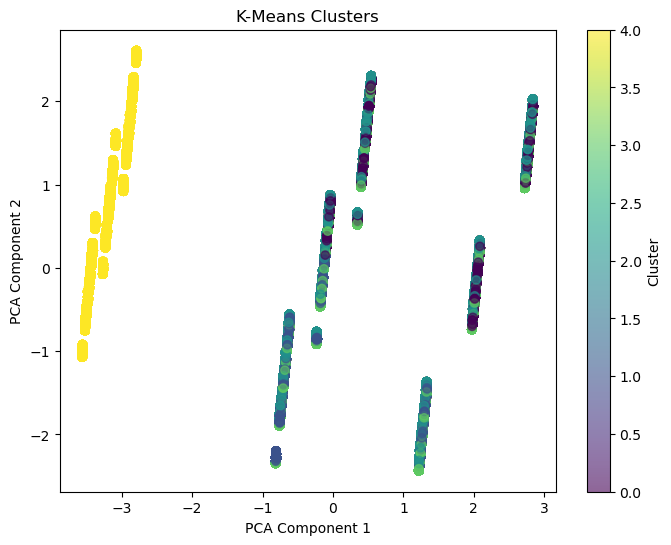

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize= (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c= clusters, cmap= 'viridis', alpha= 0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters")
plt.colorbar(label= "Cluster")
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.5, min_samples= 5)
cluster = dbscan.fit_predict(x_scaled)
data['DBSCAN_Cluster'] = cluster

data.head()

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice,KM_Clustering,DBSCAN_Cluster
0,1,20,0,1,51,7182.0,4,2,2465.0,4930.0,0,0,0,2465.0,0,0
1,1,35,0,11,434,3466.0,0,2,1733.0,3466.0,1,0,0,1733.0,3,1
2,0,18,3,0,196,8183.0,6,3,1733.0,5199.0,1,0,0,1733.0,2,2
3,0,28,0,2,594,13632.0,8,3,1733.0,5199.0,1,0,0,1733.0,0,3
4,1,56,2,8,644,5199.0,3,3,1733.0,5199.0,1,0,0,1733.0,3,4


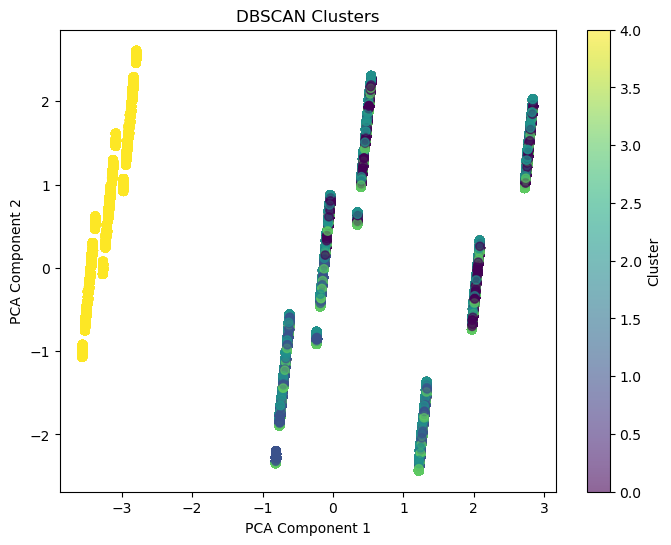

In [16]:
plt.figure(figsize= (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c= clusters, cmap= 'viridis', alpha= 0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clusters")
plt.colorbar(label= "Cluster")
plt.show()

### classification

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
data.head()

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice,KM_Clustering,DBSCAN_Cluster
0,1,20,0,1,51,7182.0,4,2,2465.0,4930.0,0,0,0,2465.0,0,0
1,1,35,0,11,434,3466.0,0,2,1733.0,3466.0,1,0,0,1733.0,3,1
2,0,18,3,0,196,8183.0,6,3,1733.0,5199.0,1,0,0,1733.0,2,2
3,0,28,0,2,594,13632.0,8,3,1733.0,5199.0,1,0,0,1733.0,0,3
4,1,56,2,8,644,5199.0,3,3,1733.0,5199.0,1,0,0,1733.0,3,4


In [19]:
X = data.drop(["KM_Clustering", "DBSCAN_Cluster"], axis= 1)
# y_km = data["KM_Clustering"]
# y_db = data["DBSCAN_Cluster"]
y = data["KM_Clustering"]

In [20]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

categorical_cols, numeric_cols

([],
 ['Gender',
  'Age',
  'CustomerCity',
  'JoinDate',
  'SaleDate',
  'SaleTotalAmount',
  'BranchName',
  'Quantity',
  'LineItemUnitPrice',
  'LineItemTotalPrice',
  'ProductName',
  'Category',
  'Brand',
  'ProductMasterPrice'])

In [21]:
# preprossing piplines

numeric_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy= 'median'))
])
categorical_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))
])

In [22]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [23]:
dt = DecisionTreeClassifier(max_depth= 4, random_state= 42)
rf = RandomForestClassifier(n_estimators= 100, random_state= 42)
gb = GradientBoostingClassifier(random_state= 42)
lr = LogisticRegression(random_state= 42)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42, stratify= y)

In [25]:
voting_hard_pipeline = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(
        estimators= [('dt', dt), ('rf', rf), ('gb', gb), ('lr', lr)],
        voting= 'hard'
    ))
])

In [26]:
voting_soft_pipeline = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(
        estimators= [('dt', dt), ('rf', rf), ('gb', gb), ('lr', lr)],
        voting= 'soft'
    ))
])

In [27]:
voting_hard_pipeline.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Gender', 'Age',
                                                   'CustomerCity', 'JoinDate',
                                                   'SaleDate',
                                                   'SaleTotalAmount',
                                                   'BranchName', 'Quantity',
                                                   'LineItemUnitPrice',
                                                   'LineItemTotalPrice',
                                                   'ProductName', 'Category',
                                                   'Brand',
                                                   'ProductMasterPrice']),
                                                 ('cat',
                                                  Pipeline(steps=[(...r',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier',
                 VotingClassifier(estimators=[('dt',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      random_state=42)),
                                              ('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('gb',
                                               GradientBoostingClassifier(random_state=42)),
                                              ('lr',
                                               LogisticRegression(random_state=42))]))])

In [28]:
voting_soft_pipeline.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Gender', 'Age',
                                                   'CustomerCity', 'JoinDate',
                                                   'SaleDate',
                                                   'SaleTotalAmount',
                                                   'BranchName', 'Quantity',
                                                   'LineItemUnitPrice',
                                                   'LineItemTotalPrice',
                                                   'ProductName', 'Category',
                                                   'Brand',
                                                   'ProductMasterPrice']),
                                                 ('cat',
                                                  Pipeline(steps=[(...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier',
                 VotingClassifier(estimators=[('dt',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      random_state=42)),
                                              ('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('gb',
                                               GradientBoostingClassifier(random_state=42)),
                                              ('lr',
                                               LogisticRegression(random_state=42))],
                                  voting='soft'))])

In [29]:
vh_y_pred = voting_hard_pipeline.predict(X_test)

accuracy_score(vh_y_pred, y_test)

1.0

In [30]:
vs_y_pred = voting_soft_pipeline.predict(X_test)

accuracy_score(vs_y_pred, y_test)

1.0

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr(numeric_only= True)
corr

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice,KM_Clustering,DBSCAN_Cluster
Gender,1.000000,0.135030,0.127307,0.263396,0.000590,-0.003551,-0.156029,0.000039,0.001585,-0.000417,-0.001211,NaN,NaN,0.001585,0.219673,-0.047247
Age,0.135030,1.000000,-0.333593,0.228786,-0.003465,-0.002301,-0.023557,-0.002163,0.001219,-0.000973,-0.001309,NaN,NaN,0.001219,-0.149812,0.096311
CustomerCity,0.127307,-0.333593,1.000000,-0.023722,0.001643,-0.000875,0.379421,-0.001815,-0.001695,-0.003459,0.001300,NaN,NaN,-0.001695,0.298924,0.041338
JoinDate,0.263396,0.228786,-0.023722,1.000000,0.002897,0.002864,-0.276156,-0.001914,-0.001172,-0.002843,0.000534,NaN,NaN,-0.001172,0.283204,0.042819
SaleDate,0.000590,-0.003465,0.001643,0.002897,1.000000,0.001838,-0.004077,-0.000790,0.000776,-0.000168,-0.000931,NaN,NaN,0.000776,0.001874,-0.002081
SaleTotalAmount,-0.003551,-0.002301,-0.000875,0.002864,0.001838,1.000000,0.001701,0.458136,-0.044335,0.338360,-0.007419,NaN,NaN,-0.044335,0.073423,-0.118837
BranchName,-0.156029,-0.023557,0.379421,-0.276156,-0.004077,0.001701,1.000000,0.001518,0.002935,0.002828,-0.002711,NaN,NaN,0.002935,-0.186057,0.049764
Quantity,0.000039,-0.002163,-0.001815,-0.001914,-0.000790,0.458136,0.001518,1.000000,0.004955,0.700244,-0.004907,NaN,NaN,0.004955,-0.105633,-0.116298
LineItemUnitPrice,0.001585,0.001219,-0.001695,-0.001172,0.000776,-0.044335,0.002935,0.004955,1.000000,0.664039,-0.984689,NaN,NaN,1.000000,-0.656778,-0.268191
LineItemTotalPrice,-0.000417,-0.000973,-0.003459,-0.002843,-0.000168,0.338360,0.002828,0.700244,0.664039,1.000000,-0.654117,NaN,NaN,0.664039,-0.521948,-0.246909


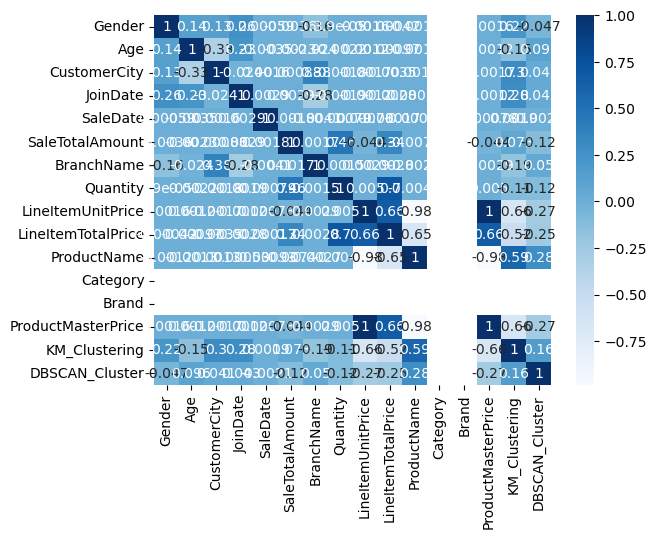

In [32]:
sns.heatmap(corr, annot= True, cmap= 'Blues')
plt.show()

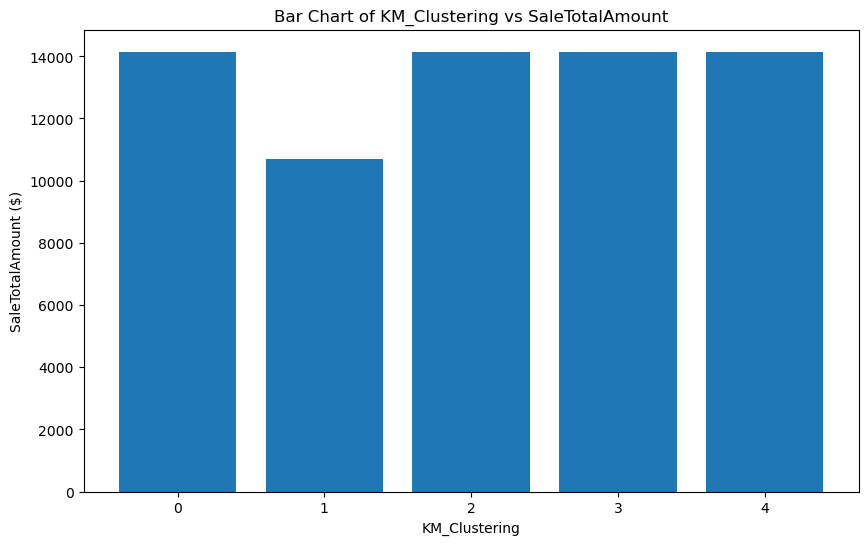

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(
    data['KM_Clustering'],
    data['SaleTotalAmount']
)
plt.xlabel("KM_Clustering")
plt.ylabel("SaleTotalAmount ($)")
plt.title("Bar Chart of KM_Clustering vs SaleTotalAmount")
plt.show()

In [34]:
data.head()

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice,KM_Clustering,DBSCAN_Cluster
0,1,20,0,1,51,7182.0,4,2,2465.0,4930.0,0,0,0,2465.0,0,0
1,1,35,0,11,434,3466.0,0,2,1733.0,3466.0,1,0,0,1733.0,3,1
2,0,18,3,0,196,8183.0,6,3,1733.0,5199.0,1,0,0,1733.0,2,2
3,0,28,0,2,594,13632.0,8,3,1733.0,5199.0,1,0,0,1733.0,0,3
4,1,56,2,8,644,5199.0,3,3,1733.0,5199.0,1,0,0,1733.0,3,4


In [35]:
import numpy as np

def generate_rating(row):
    probs = [0.05, 0.10, 0.15, 0.35, 0.35]
    
    if row['Quantity'] > 1:
        probs = [0.02, 0.05, 0.10, 0.30, 0.53]
        
    rating = np.random.choice([1, 2, 3, 4, 5], p= probs)
    return rating

data['Rating'] = data.apply(generate_rating, axis= 1)

data['Rating'].value_counts().sort_index()

Rating
1     6315
2    14084
3    24348
4    66558
5    98695
Name: count, dtype: int64

In [44]:
import random

reviews_5_star = [
    "Absolutely love my {product}! Best purchase ever.",
    "The {product} exceeded my expectations. Highly recommended.",
    "Great quality and fast shipping. I love this {product}.",
    "Five stars! The {product} is perfect.",
    "I use this {product} every day. rigorous quality."
]

reviews_4_star = [
    "The {product} is pretty good, works as expected.",
    "Happy with the purchase of {product}, though delivery was a bit slow.",
    "Good value for money. The {product} is nice.",
    "Solid performance. I like the {product}.",
    "Would buy the {product} again."
]

reviews_3_star = [
    "The {product} is okay, but nothing special.",
    "Average quality. The {product} does the job.",
    "Not bad, but I expected more from this {product}.",
    "It's decent. The {product} is just alright.",
    "Mixed feelings about this {product}."
]

reviews_2_star = [
    "Not very happy with the {product}. Quality is lacking.",
    "The {product} arrived late and looked different than the picture.",
    "I wouldn't recommend this {product} to a friend.",
    "Below average. The {product} feels cheap.",
    "Disappointed with the {product}."
]

reviews_1_star = [
    "Terrible experience. The {product} broke immediately.",
    "Do not buy this {product}! Waste of money.",
    "Worst purchase I've made. The {product} is awful.",
    "Totally useless. I returned the {product}.",
    "Horrible quality. The {product} is a scam."
]

def generate_review_text(row):
    product_name = row['ProductName']
    rating = row['Rating']
    
    if rating == 5:
        template = random.choice(reviews_5_star)
    elif rating == 4:
        template = random.choice(reviews_4_star)
    elif rating == 3:
        template = random.choice(reviews_3_star)
    elif rating == 2:
        template = random.choice(reviews_2_star)
    else: 
        template = random.choice(reviews_1_star)
        
    return template.format(product= product_name)

data['ReviewText'] = data.apply(generate_review_text, axis= 1)

print(data[["ProductName", "Rating", "ReviewText"]].head())

   ProductName  Rating                                         ReviewText
0            0       5  The 0.0 exceeded my expectations. Highly recom...
1            1       4                 Solid performance. I like the 1.0.
2            1       5                    Five stars! The 1.0 is perfect.
3            1       5        I use this 1.0 every day. rigorous quality.
4            1       4             Good value for money. The 1.0 is nice.


In [45]:
data.head()

,Gender,Age,CustomerCity,JoinDate,SaleDate,SaleTotalAmount,BranchName,Quantity,LineItemUnitPrice,LineItemTotalPrice,ProductName,Category,Brand,ProductMasterPrice,KM_Clustering,DBSCAN_Cluster,Rating,ReviewText
0,1,20,0,1,51,7182.0,4,2,2465.0,4930.0,0,0,0,2465.0,0,0,5,The 0.0 exceeded my expectations. Highly recom...
1,1,35,0,11,434,3466.0,0,2,1733.0,3466.0,1,0,0,1733.0,3,1,4,Solid performance. I like the 1.0.
2,0,18,3,0,196,8183.0,6,3,1733.0,5199.0,1,0,0,1733.0,2,2,5,Five stars! The 1.0 is perfect.
3,0,28,0,2,594,13632.0,8,3,1733.0,5199.0,1,0,0,1733.0,0,3,5,I use this 1.0 every day. rigorous quality.
4,1,56,2,8,644,5199.0,3,3,1733.0,5199.0,1,0,0,1733.0,3,4,4,Good value for money. The 1.0 is nice.


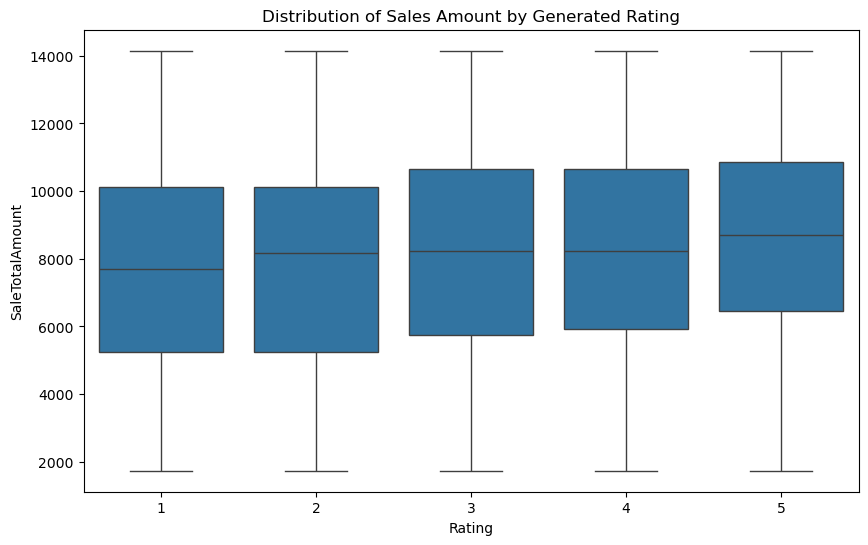

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'Rating', y='SaleTotalAmount', data= data)
plt.title('Distribution of Sales Amount by Generated Rating')
plt.show()